# <span style="color:blue">Esercitazione 2</span>

### Esercizio 02.1


L'obiettivo del primo esercizio è quello di sottilineare l'incremento di efficienza nel calcolo Monte Carlo di un integrale introdotto dal metodo dell'*importance sampling*.

In particolare considero l'integrale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
e svolgo i seguenti punti:

1. Calcolare l'integrale col metodo MC di base\
Interpreto cioè l'integrale come $I = \int_0^1 g(x) p(x) dx$, con $g(x)$ uguale all'integranda e $p(x)$ uniforme in $[0,1)$. Per definizione $I$ coincide quindi col valore di aspettazione di $g(x)$ associato all'estrazione casuale dela variabile indipedente $x$ secondo una distribuzione di probabilità $p(x)$. Dal punto di vista pratico basterà eseguire un campionamento di questa distribuzione e calcolare il valore medio degli $g(x_i)$ associati alle ascisse estratte.
2. Calcolare l'integrale sfruttando l'importance sampling\
Passo qui al''interpretazione dell'integrale come($p(x)=1$)
$$I = \int_0^1 \left[ \frac {g(x)}{d(x)} \right] d(x) dx$$
dove $d(x)$ è in linea di principio scelta il più possibile simile all'integranda, in modo da ridurre sensibilmente l'incertezza del risultato a parità del numero di blocchi (e di punti per blocco) utilizzati riducendo la varianza stessa della distribuzione delle singole misure di $I$ come valore di aspettazione secondo $d(x)$ dell'espressione nelle quadre.\
(In questo caso particolare l'integrale è noto, e quindi si può prendere esattamente $d(x) = g(x) p(x) / I$, che porterebbe ad un'incertezza nulla, ma non è questo l'obbiettivo dell'esercizio).

Anche qui utilizzo il *blocking method*: separerò le $x_i$ estratte (in totale in numero $M=10^5$) in $N=100$ blocchi differenti, ognuno dei quali fornirà una misura indipendente dell'integrale $I$. Grazie al CLT il risultato ottenuto dopo l'analisi di un qualunque numero di blocchi come miglior stima dell'integrale sarà dato dalla media delle misure dei singoli blocchi, e la sua incertezza sarà stimabile come la deviazione standard della media del gruppo di risultati di singolo blocco considerato.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes    # zoomed up image libraries
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

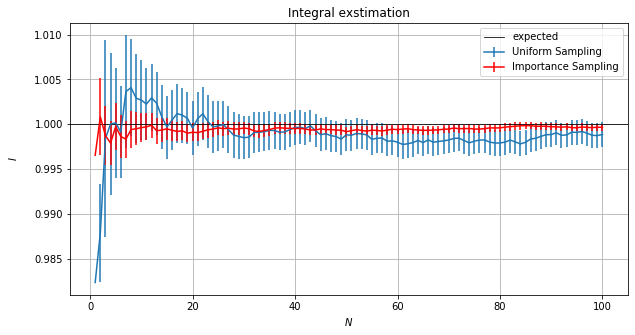

In [2]:
N=np.loadtxt('res01.out',max_rows=1)  # Number of blocks
data=np.genfromtxt('res01.out',skip_header=1,delimiter=',',names='res,err,resIm,erIm')
x=np.arange(N)                        # [0,1,2,...,N-1]

pl.figure(figsize=(10,5))
pl.errorbar(x+1,data['res'],yerr=data['err'],label='Uniform Sampling')
pl.errorbar(x+1,data['resIm'],yerr=data['erIm'],color='r',label='Importance Sampling')
pl.axhline(y=1,color='k',linewidth=0.8,label='expected')
pl.legend(loc='best')
pl.xlabel('$N$')
pl.ylabel('$I$',labelpad=15)
pl.grid(True)
pl.title('Integral exstimation')
pl.show()

Il grafico mette a confronto i due casi, evidenziando come da subito e in modo permanente la miglior efficienza dell'*importnace sampling*.\
In questo caso particolare come distribuzione $d(x)$ ho utilizzato lo sviluppo di Taylor dell'integranda a partire da $x=1/2$, e cioè, una volta normalizzato,

$$ d(x) = \frac {\pi}{2} \left( \frac{1}{2}+\frac{2}{\pi}-x \right)$$

$$ \left[ \frac {g(x)}{d(x)} \right] = \frac {\cos \left( \frac{\pi}{2}x \right)}  {\frac{1}{2}+\frac{2}{\pi}-x}$$

Per estrarre ascisse $x_i$ secondo questa distribuzione di probabilità ho utilizzato il metodo *accept/reject*.

### Esercizio 02.2
Nel secondo esercizio ho simulato due tipi di *random walk* in tre dimensioni, uno discreto, con passi $a=1$ vincolati ai siti di un reticolo cubico, e uno continuo (spazialmente), con passi ancora $a$ ma liberi nello spazio 3D. L'obbiettivo principale era quello di studiare l'andamento della distanza media $R \equiv \sqrt{\langle |\vec{r}_{N_{st}}|^2 \rangle_{RW}}$ percorsa (dall'origine) al crescere del numero di passi compiuti. Ognuno dei due tipi di cammini è stato simulato per $M=5 \times 10^4$ volte, e i risultati sono stati divisi in $N=100$ blocchi per stimarne l'incertezza col *blocking method*.



Nel caso discreto per scegliere direzione e verso casuale del moto ho estratto uniformemente un numero in $[0,3)$ e associato ad ogni intervallo largo $0.5$ uno dei sei possibili eventi equiprobabili (avanti o indietro lungo $x$, $y$ o $z$).\
Nel caso continuo per campionare uniformemente l'angolo solido ho utilizzato il metodo *accept/reject* estraendo tre numeri casuali in $[-1,1)$ (le tre coordinate) e accettando l'angolo individuato dal vettore che collega l'origine al punto da esse individuato solo se questo cade all'interno della sfera unitaria (equivalentemente si poteva utilizzare il metodo dell'inversa della cumulata per estrarre $\theta$ secondo una probabilità $\sin \theta$; in questo semplice problema il guadagno in efficienza computazionale è trascurabile).

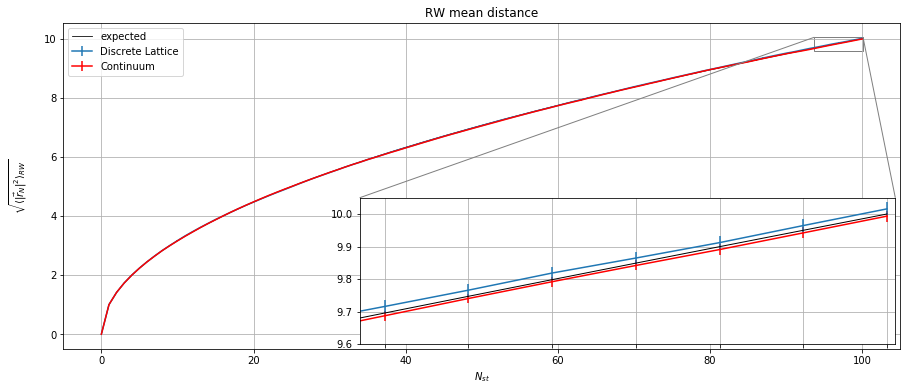

In [3]:
N,a=np.loadtxt('res02.out',delimiter=',',max_rows=1)  # Number of total steps
data=np.genfromtxt('res02.out',skip_header=1,delimiter=',',names='r,err,rC,erC')
x=np.arange(N)         # [0,1,2,...,N-1]
fit=a*np.sqrt(x)       # see below for explanation

fig,ax=pl.subplots(figsize=(15,6))
ax.errorbar(x,data['r'],yerr=data['err'],label='Discrete Lattice')
ax.errorbar(x,data['rC'],yerr=data['erC'],color='r',label='Continuum')
ax.plot(x,fit,color='k',linewidth=0.8,label='expected')
pl.legend(loc='best')
pl.xlabel(r'$N_{st}$')
pl.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle _{RW}}$',labelpad=15)
pl.grid(True)
pl.title('RW mean distance')

axins=zoomed_inset_axes(ax,11,loc=4)   # zoomed part, axes instance zoomed, zoom and position
axins.plot(x,fit,color='k',linewidth=1)
axins.errorbar(x,data['rC'],yerr=data['erC'], color='r')
axins.errorbar(x,data['r'],yerr=data['err'])
axins.set_xlim(93.7,100.1)
axins.set_ylim(a*9.6,a*10.05)
pl.xticks(visible=False)
pl.grid(True)
mark_inset(ax,axins,loc1=1,loc2=2,fc='none',ec='0.5')

pl.show()

Per il fit con la curva $f(N_{st})=a\sqrt{N_{st}}$, pienamente compatibile, il ragionamento sul caso discreto è stato il seguente.\
Il *random walk* 3D può essere interpretato come la sovrapposizione di tre RW 1D distinti che avvengono indipendentemente nelle tre direzioni spaziali. Per ognuno di essi valgono i risultati del CLT. Ognuna delle coordinate della posizione finale del walker è data infatti da una somma del tipo $X_{N_x} = \sum_{i=1}^{N_x} x_i$, dove la distribuzione di probabilità della singola $x_i$ è $p(x)=0.5 \ [\delta(x+a)+\delta(x-a)]$. Dal teorema sappiamo quindi che per ognuno dei RW monodimensionali vale $\langle X\rangle =0$ e $\sigma^2_{N_x} = N_x a^2$.
In particolare vale dunque $\langle X^2_{N_x} \rangle = \sigma^2_{N_x}$, e quindi per la grandezza oggetto della nostra misura si ha
$$\sqrt{\langle |\vec{r}_{N_{st}}|^2 \rangle_{RW}} =
\sqrt{\langle X^2_{N_x} \rangle + \langle Y^2_{N_y} \rangle + \langle Z^2_{N_z} \rangle} =
a \sqrt{N_x + N_y + N_z} = a \sqrt{N_{st}} $$
L'ultima uguaglianza è dovuta al fatto che ad ogni step del RW 3D il passo è eseguito in una e una sola delle tre direzioni spaziali, e quindi conta come step di un unico dei tre RW 1D indipendenti.\
Per il caso continuo il ragionamento è analogo, ma qui ad ogni step posso modificare contemporaneamente anche tutti i RW indipendenti associati alle tre dimensioni (direzione arbitraria), e il passo ad essi associato varia casualmente di step in step. Il tutto è formalmente più complicato ma porta alle stesse conclusioni.

I risultati ottenuti evidenziano il comportamento diffusionale del processo osservato. L'andamento della distanza media percorsa è infatti determinato dal fatto che la probabilità (in ogni dimesione) di trovare il walker a una certa distanza dall'origine è descritta da una distribuzione gaussiana sempre centrata sull'origine e con larghezza crescente come la radice del numero di step effettuati (sto pensando qui di avere dei passi a distanza fissata in ognuna delle direzioni principali; l'interpretazione è immediata nel caso discreto, ma il discorso vale anche nel caso continuo). Questo comportamento è proprio quello che caratterizza i processi diffusionali.